<a href="https://colab.research.google.com/github/MinervaNunez/Proyecto-de-Python-BEDU/blob/main/bedu_proyecto_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto de Python Equipo 8

>   *   Nicky García Fierros (nickygarcia@ciencias.unam.mx)
>   *   Kevin Martin Rivera Castro (kevinrc.unam@gmail.com)
>   *   Jesús Manuel Jimenez Cardoza (chucho003@hotmail.com)
>   *   Minerva Estefanía Núñez Manjarrez (estefania.nun.man@gmail.com)
>   *   Luis Mateo Patricio Pineda (mateopa@gmail.com)

---

## Introducción

---

---

## Librerías necesarias

---

In [247]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

---

## Lectura de Datos

---

Leemos el ```DataFrame``` resultante de nuestro proyecto anterior.

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/KevinRC55/Proyecto-de-Python-BEDU/main/RNPEDFC_Final.csv', encoding='ISO-8859-1')

Obtenermos como resultado nuesto ```DataFrame``` principal.

In [4]:
df

,anio,fecha,hora,dias_desaparecido,entidad,municipio,localidad,coordenadas,nacionalidad,sexo,edad,estatura,complexion,senas_particulares,discapacidad,dependecia_origen
0,2012,2012-03-18,05:00:00,2234,Sonora,Navojoa,Navojoa,"27.069053, -109.439423",Mexicana,Mujer,7,1.10,Delgada,Tiene Una Cicatriz En La Rodilla Izquierda Por...,Ninguno,FGE - Sonora
1,2007,2007-02-05,02:00:26,4102,Estado De Mexico,Valle De Bravo,Valle De Bravo,"19.16368, -100.134684",Mexicana,Mujer,4,1.10,Delgada,No Especificado,Ninguno,FGJ - Estado De Mexico
2,2009,2009-03-14,08:30:54,3334,Estado De Mexico,Chalco,Chalco,"19.266337, -98.8978",Mexicana,Hombre,6,1.10,Delgada,"Manchas, Parte Superior De Pierna Derecha, Cic...",Ninguno,FGJ - Estado De Mexico
3,2006,2006-12-23,08:00:28,4146,Estado De Mexico,Tlalnepantla De Baz,Tlalnepantla De Baz,"19.547512, -99.193851",Mexicana,Hombre,10,1.10,Delgada,"Lunares, A La Altura De La Cinturaforma De Man...",Ninguno,FGJ - Estado De Mexico
4,2008,2008-01-11,12:00:17,3762,Estado De Mexico,Toluca,Toluca,"18.078, -91.6552",Mexicana,Hombre,4,1.10,Delgada,No Especificado,Ninguno,FGJ - Estado De Mexico
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35896,2018,2018-04-26,08:00:00,4,Puebla,Puebla,Puebla,"19.051201, -98.212116",Mexicana,Hombre,22,1.60,Delgada,Lunar En La Mejilla Y Tatuaje En El Cuello En ...,Ninguno,FGE - Puebla
35897,2018,2018-01-08,11:00:00,112,Colima,Villa De Alvarez,Villa De Alvarez,"19.25, -103.73333",Mexicana,Mujer,27,1.70,Robusta,"El Ojo Izquierdo Tiene Un Enfermedad Como Tic,...",Ninguno,PGJ - Colima
35898,2015,2015-02-02,07:00:00,1183,Puebla,Chila,Chilas De Las Flores,"17.965896, -97.864616",Mexicana,Mujer,86,1.77,Mediana,No Especificado,Ninguno,FGE - Puebla
35899,2017,2017-08-22,04:00:00,251,Colima,Villa De Alvarez,Villa De Alvarez,"19.25, -103.73333",Mexicana,Hombre,41,1.76,Robusta,Tatuaje En El Brazo Izquierdo Con La Imagen De...,Ninguno,PGJ - Colima


##  Análisis bivariado y Regresión Lineal Simple

### Variables númericas

Usamos `dtypes` para ver el tipo de variables con las que contamos.

In [5]:
df.dtypes

anio                    int64
fecha                  object
hora                   object
dias_desaparecido       int64
entidad                object
municipio              object
localidad              object
coordenadas            object
nacionalidad           object
sexo                   object
edad                    int64
estatura              float64
complexion             object
senas_particulares     object
discapacidad           object
dependecia_origen      object
dtype: object

Creamos una lsita con el nombre de nuestras variables númericas.

In [18]:
numericas = df.select_dtypes( include=['int64','float64'] ).columns.tolist()
numericas

['anio', 'dias_desaparecido', 'edad', 'estatura']

Visualizamos nuestras variables númericas.

In [19]:
df[numericas]

,anio,dias_desaparecido,edad,estatura
0,2012,2234,7,1.10
1,2007,4102,4,1.10
2,2009,3334,6,1.10
3,2006,4146,10,1.10
4,2008,3762,4,1.10
...,...,...,...,...
35896,2018,4,22,1.60
35897,2018,112,27,1.70
35898,2015,1183,86,1.77
35899,2017,251,41,1.76


In [20]:
df[numericas].sample(10)

,anio,dias_desaparecido,edad,estatura
11178,2010,2702,28,1.73
23309,2015,1059,14,1.50
33026,2017,450,28,1.64
21803,2015,927,38,1.70
106,2007,4094,28,1.60
3029,2012,2028,18,1.58
11847,2012,1958,70,1.70
26111,2016,587,56,1.67
20328,2015,1094,17,1.60
34846,2018,55,17,1.70


> Tenemos cuatro variables númericas ```anio```, ```dias_desaparecido```, ```edad``` y ```estatura```.

### Correlación

Generamos una matriz de correlaciones para visualizar las relaciones entre nuestras variables.

In [22]:
df[numericas].corr()

,anio,dias_desaparecido,edad,estatura
anio,1.000000,-0.995779,-0.101131,-0.105262
dias_desaparecido,-0.995779,1.000000,0.100607,0.106969
edad,-0.101131,0.100607,1.000000,0.257746
estatura,-0.105262,0.106969,0.257746,1.000000


Usamos un mapa de calor papa visualizar la correlación de mejor manera.

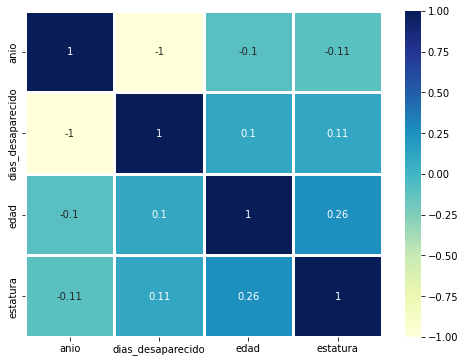

In [25]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[numericas].corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu", linewidths=3);

> Podemos observar un alto coeficiente de correlación negativa entre el año de desaparición y los días desaparecido, esto es lógico, ya que el cálculo de los días desaparecidos se realiza a partir del año de desaparición.
También observamos una relación positiva, aunque no tan fuerte, entre la edad y la estatura.

### Gráficas de dispersión y valores atípicos

Generamos gráficas de dispersión para visualizar la relación entre pares de variables.

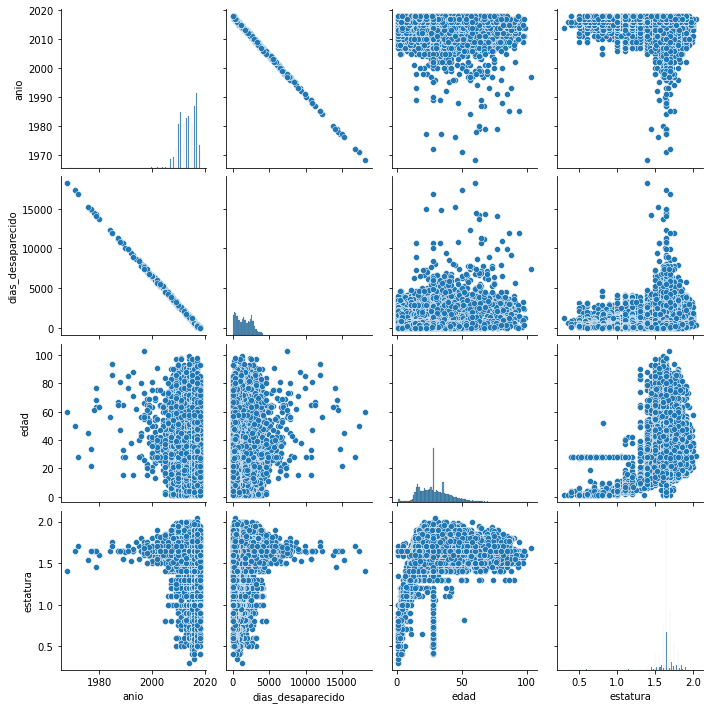

In [26]:
sns.pairplot(df[numericas])

Visualicemos de forma detallada las correlaciones que identificamos en nuestra matriz de correlaciones.

/home/kevin/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='anio', ylabel='dias_desaparecido'>

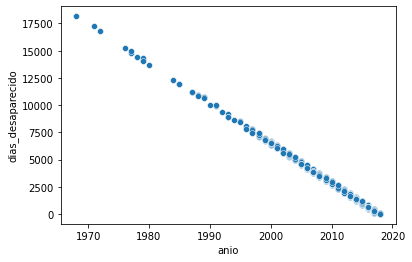

In [27]:
sns.scatterplot(df['anio'], df['dias_desaparecido'])

/home/kevin/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='edad', ylabel='estatura'>

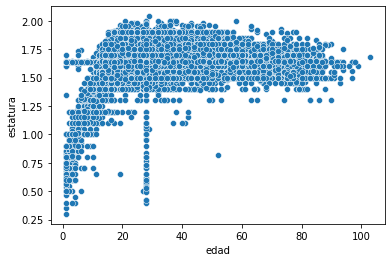

In [28]:
sns.scatterplot(df['edad'], df['estatura'])

> Podemos ver de forma clara la línea recta que se forma entre el año de desaparición y los días desaparecido. En cuanto a las variables de edad y estatura, no es clara una recta entre los valores.

Observaremos si existen valores atípicos en estatura y edad, y si el eliminarlos mejora la relación entre estas variables.

#### Edad

Generamos un boxplot para identificar los valores atípicos en edad.

/home/kevin/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='edad'>

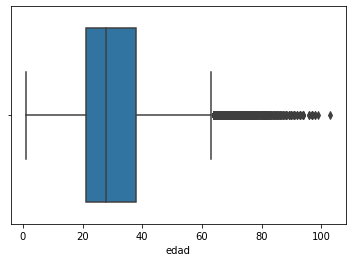

In [219]:
sns.boxplot(df['edad'])

Eliminamos estos valores para recalcular el coeficiente de correlación.

In [220]:
iqr_edad = df['edad'].quantile(0.75) - df['edad'].quantile(0.25)
filter_upper_outliers = df['edad'] < (df['edad'].quantile(0.75) + iqr_edad * 1.5)
df_edad_no_outliers = df[filter_upper_outliers]

/home/kevin/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='edad', ylabel='estatura'>

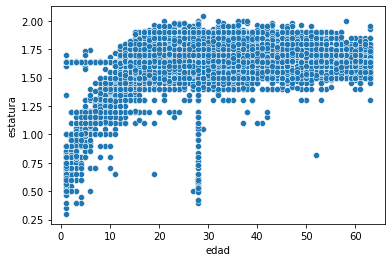

In [221]:
sns.scatterplot(df_edad_no_outliers['edad'], df_edad_no_outliers['estatura'])

In [222]:
df_edad_no_outliers['edad'].corr(df_edad_no_outliers['estatura'])

0.3190104081580716

> Nuestro coeficiente de correlación mejoro, sin embargo, sigue sin ser clara la relación en la gráfica de dispersión.

#### Estatura

Generamos un boxplot para identificar los valores atípicos en estatura.

/home/kevin/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='estatura'>

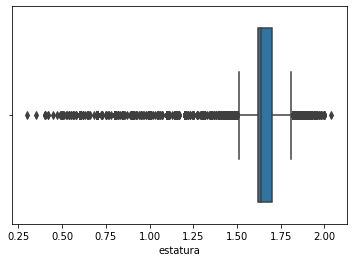

In [223]:
sns.boxplot(df['estatura'])

Eliminamos estos valores para recalcular el coeficiente de correlación.

In [224]:
iqr_estatura = df['estatura'].quantile(0.75) - df['estatura'].quantile(0.25)
filter_outliers = (df['estatura'] > (df['estatura'].quantile(0.25) - iqr_estatura * 1.5)) & (df['estatura'] < (df['estatura'].quantile(0.75) + iqr_estatura * 1.5))
df_estatura_no_outliers = df[filter_outliers]

/home/kevin/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='edad', ylabel='estatura'>

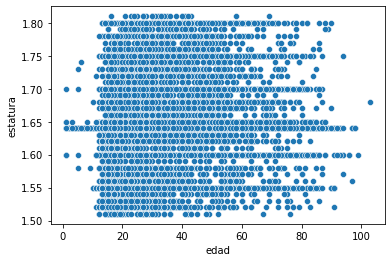

In [225]:
sns.scatterplot(df_estatura_no_outliers['edad'], df_estatura_no_outliers['estatura'])

In [226]:
df_estatura_no_outliers['edad'].corr(df_estatura_no_outliers['estatura'])

0.08665368625720392

> Nuestro coeficiente de correlación disminulló bastante.

Probemos eliminar únicamente los outliers superiores en ```estatura``` a partir del DataFrame sin ouliers en ``edad``.

In [241]:
iqr_estatura = df_edad_no_outliers['estatura'].quantile(0.75) - df_edad_no_outliers['estatura'].quantile(0.25)
filter_outliers = (df_edad_no_outliers['estatura'] < (df_edad_no_outliers['estatura'].quantile(0.75) + iqr_estatura * 1.5))
df_edad_estatura_no_outliers = df_edad_no_outliers[filter_outliers]

/home/kevin/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='edad', ylabel='estatura'>

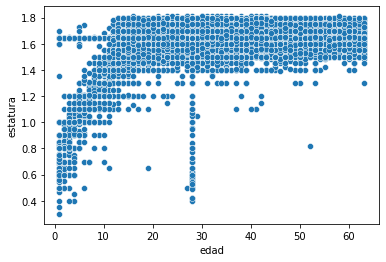

In [242]:
sns.scatterplot(df_edad_estatura_no_outliers['edad'], df_edad_estatura_no_outliers['estatura'])

In [243]:
df_edad_estatura_no_outliers['edad'].corr(df_edad_estatura_no_outliers['estatura'])

0.3225168656487733

In [244]:
100 - ((df_edad_estatura_no_outliers.shape[0]*100) / df.shape[0])

6.105679507534603

> Nuestro coeficiente de correlación mejoró un poco y únicamente eliminamos un 6% de nuestros registros.

### Modelo de Regresión Lineal

Al ver el comportamiento de la relación de nuestras variables numéricas identificamos dos relaciones, anio-dias_desaparecido y edad-estatura. En la primera relación tenemos un cálculo directo entre una y otra variable, en nuestra segunda relación, aunque no obtuvimos un coeficiente de correlación tan alto, nos podría interesar predecir la estatura de una persona, ya que posiblemente este sea el dato que se desconoce con mayor frecuencia al realizar un reporte de desaparición.

Considerando lo anterior, utilizaremos un modelo de regresión lineal simple para predecir la altura de una persona a partir de la edad.

Usamos el `DataFrame` resultante de la eliminación de outliers en edad y estatura.

In [246]:
df_regresion = df_edad_estatura_no_outliers
df_regresion

,anio,fecha,hora,dias_desaparecido,entidad,municipio,localidad,coordenadas,nacionalidad,sexo,edad,estatura,complexion,senas_particulares,discapacidad,dependecia_origen
0,2012,2012-03-18,05:00:00,2234,Sonora,Navojoa,Navojoa,"27.069053, -109.439423",Mexicana,Mujer,7,1.10,Delgada,Tiene Una Cicatriz En La Rodilla Izquierda Por...,Ninguno,FGE - Sonora
1,2007,2007-02-05,02:00:26,4102,Estado De Mexico,Valle De Bravo,Valle De Bravo,"19.16368, -100.134684",Mexicana,Mujer,4,1.10,Delgada,No Especificado,Ninguno,FGJ - Estado De Mexico
2,2009,2009-03-14,08:30:54,3334,Estado De Mexico,Chalco,Chalco,"19.266337, -98.8978",Mexicana,Hombre,6,1.10,Delgada,"Manchas, Parte Superior De Pierna Derecha, Cic...",Ninguno,FGJ - Estado De Mexico
3,2006,2006-12-23,08:00:28,4146,Estado De Mexico,Tlalnepantla De Baz,Tlalnepantla De Baz,"19.547512, -99.193851",Mexicana,Hombre,10,1.10,Delgada,"Lunares, A La Altura De La Cinturaforma De Man...",Ninguno,FGJ - Estado De Mexico
4,2008,2008-01-11,12:00:17,3762,Estado De Mexico,Toluca,Toluca,"18.078, -91.6552",Mexicana,Hombre,4,1.10,Delgada,No Especificado,Ninguno,FGJ - Estado De Mexico
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35895,2018,2018-04-15,06:30:00,15,Colima,Colima,Colima,"19.242918, -103.709341",Mexicana,Hombre,57,1.59,Robusta,Tiene Una Cicatriz En La Parte Baja De Su Abdo...,Ninguno,PGJ - Colima
35896,2018,2018-04-26,08:00:00,4,Puebla,Puebla,Puebla,"19.051201, -98.212116",Mexicana,Hombre,22,1.60,Delgada,Lunar En La Mejilla Y Tatuaje En El Cuello En ...,Ninguno,FGE - Puebla
35897,2018,2018-01-08,11:00:00,112,Colima,Villa De Alvarez,Villa De Alvarez,"19.25, -103.73333",Mexicana,Mujer,27,1.70,Robusta,"El Ojo Izquierdo Tiene Un Enfermedad Como Tic,...",Ninguno,PGJ - Colima
35899,2017,2017-08-22,04:00:00,251,Colima,Villa De Alvarez,Villa De Alvarez,"19.25, -103.73333",Mexicana,Hombre,41,1.76,Robusta,Tatuaje En El Brazo Izquierdo Con La Imagen De...,Ninguno,PGJ - Colima


Definimos nuestro modelo de regresión lineal y realizamos el entrenamiento.

In [249]:
lr = LinearRegression()

lr.fit(df_regresion['edad'].to_frame(), df_regresion['estatura'])

LinearRegression()

Usando nuestro modelo entrenado, usamos de nuevo nuestra variable `edad` para intentar predecir `estatura`.

In [250]:
y_predict = lr.predict(df_regresion['edad'].to_frame())

Graficamos nuestras estaturas originales y las estaturas predecidas.

/home/kevin/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/kevin/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


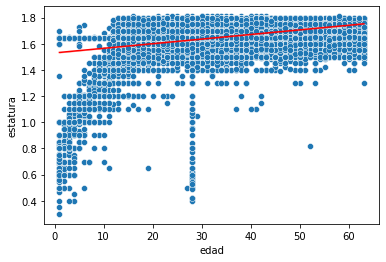

In [253]:
sns.scatterplot(df_regresion['edad'], df_regresion['estatura']);
sns.lineplot(df_regresion['edad'], y_predict, color='r');

Obtenemos el coeficiente de determinación de nuestro modelo entrenado.

In [255]:
print(f"R2: {lr.score(df_regresion['edad'].to_frame(), df_regresion['estatura'])}")

R2: 0.10401712862790868


> Nuestro modelo no es muy bueno, muestra variable `edad` explica el 10.4% de la variabilidad de nuestra variable `estatura`. Aun podemos mejorar este modelo considerando alguna otra variable de nuestro `DataFrame` pero esta es solo una primera aproximación a un modelo completo de Machine Learning.